In [1]:
from nilmtk.api import API
import warnings

warnings.filterwarnings("ignore")
from nilmtk.disaggregate import DM_SDA, GaterSGN, SGN

In [2]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
import pytorch_lightning as pl

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

# from src import *

USE_GPU = True
device = torch.device("cuda:0" if USE_GPU and torch.cuda.is_available() else "cpu")
print(torch.__version__, pl.__version__, device)

2.0.1 2.0.4 cuda:0


SGN
Started training for  SGN
Joint training for  SGN
............... Loading Data for training ...................
Loading data for  redd  dataset
Loading building ...  2
Loading data for meter ElecMeterID(instance=1, building=2, dataset='REDD')     {'fill_method': None, 'how': 'mean'}
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     {'fill_method': None, 'how': 'mean'}

Done loading data all meters for this chunk.
{'fill_method': None, 'how': 'mean'}
Dropping missing values
Train Jointly
Loading building ...  3
Loading data for meter ElecMeterID(instance=1, building=3, dataset='REDD')     {'fill_method': None, 'how': 'mean'}
Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     {'fill_method': None, 'how': 'mean'}

Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=13, building=3, dataset='REDD')     {'fill_method': None, 'how': 'mean'}
Loading data for meter ElecMeterID(instance=14, building

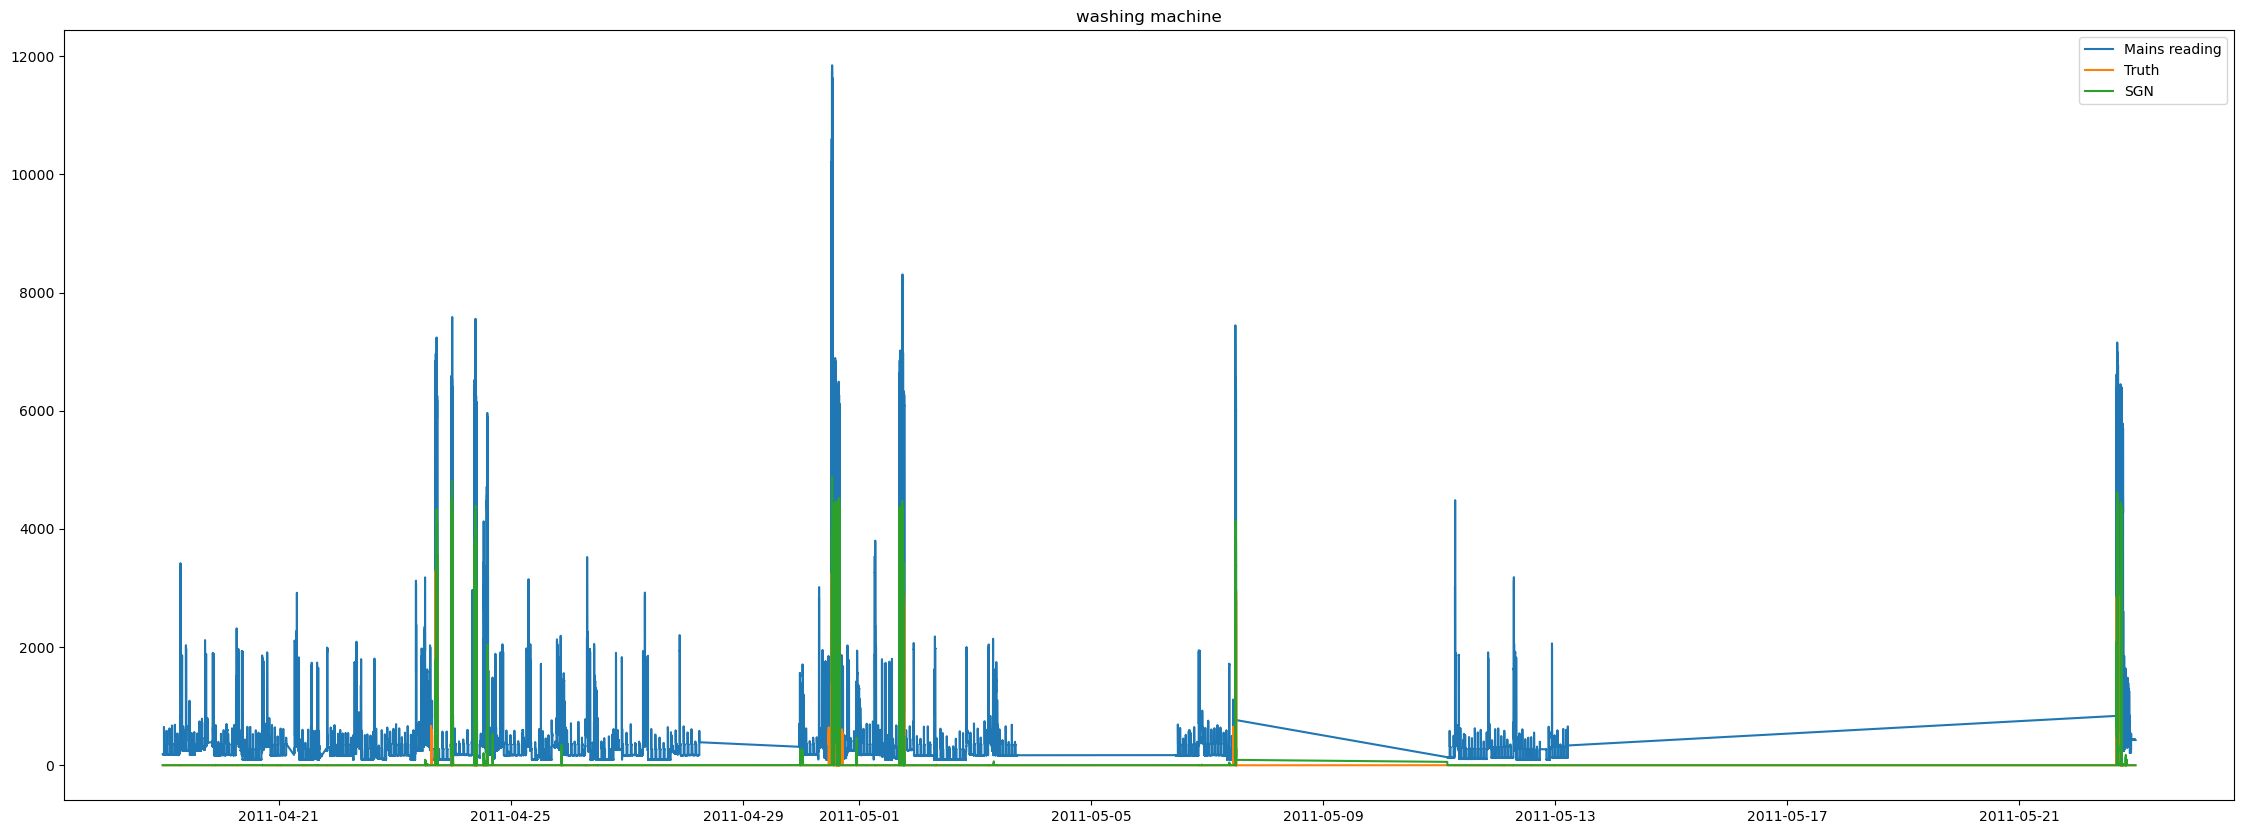

In [3]:
e = {
    # Specify power type, sample rate and disaggregated appliance
    'power': {
        # 'mains': ['active'],
        # 'appliance': ['active']
        'mains': ['apparent'],  # problem: ukdale active, redd apparent
        'appliance': ['active']
    },
    'sample_rate': 6,
    # 'appliances': ['fridge'],
    'appliances': ['washing machine'],
    # Universally no pre-training
    'pre_trained': False,
    # Specify algorithm hyper-parameters
    'methods': {
        # "GaterSGN": GaterSGN(
        # {'n_epochs': 10, 'batch_size': 256, 'test_only': False}),
        "SGN": SGN(
        {'n_epochs': 50, 'batch_size': 256, 'test_only': False, 'gate_only': False, 'patience': 5, 'note': 'redd'})
        },
        
    # Specify train and test data
    'train': {
        'datasets': {
            # 'ukdale': {
            #     'path': 'mnt/ukdale.h5',
            #     'buildings': {
            #         1: {
            #             'start_time': '2013-05-31',
            #             'end_time': '2014-12-31'
            #         },
            #         # 2: {
            #         #     'start_time': '2013-05-22',
            #         #     'end_time': '2013-08-01'
            #         # },
            #         5: {
            #             'start_time': '2014-07-01',
            #             'end_time': '2014-09-05'
            #         },
            #     }
            # },
            'redd': {
                'path': 'mnt/redd.h5',
                'buildings': {
                    2: {
                        'start_time': '2011-04-18',
                        'end_time': '2011-05-21'
                    },
                    3: {
                        'start_time': '2011-04-17',
                        'end_time': '2011-05-29'
                    },
                    4: {
                        'start_time': '2011-04-17',
                        'end_time': '2011-06-02'
                    },
                    5: {
                        'start_time': '2011-04-19',
                        'end_time': '2011-05-30'
                    },
                    6: {
                        'start_time': '2011-05-22',
                        'end_time': '2011-06-13'
                    },
                }
            }
        }
    },
    # 'transfer': {
    #     'datasets': {
    #         'redd': {
    #             'path': 'mnt/redd.h5',
    #             'buildings': {
    #                 # 1: {
    #                 #     'start_time': '2011-04-19',
    #                 #     'end_time': '2011-05-04'
    #                 # }
    #                 2: {
    #                     'start_time': '2011-04-18',
    #                     'end_time': '2011-04-25'
    #                 }
    #             }
    #         },
    #         # 'ukdale': {
    #         #   'path': 'mnt/ukdale.h5',
    #         #   'buildings': {
    #         #         1: {
    #         #               'start_time': '2013-05-01 00:00',
    #         #               'end_time': '2013-05-14 00:00'
    #         #         }
    #         #     }
    #         #   },
    #     },
    # },
    'test': {
        'datasets': {
            # 'ukdale': {
            #   'path': 'mnt/ukdale.h5',
            #   'buildings': {
            #         2: {
            #               'start_time': '2013-05-22 00:00',
            #               'end_time': '2013-08-01 00:00'
            #         }
            #     }
            #   },
            'redd': {
                'path': 'mnt/redd.h5',
                # 'buildings': {
                #     2: {
                #         'start_time': '2011-04-26',
                #         'end_time': '2011-04-30'
                #     }
                # }
                'buildings': {
                    1: {
                        'start_time': '2011-04-19',
                        'end_time': '2011-05-23'
                    }
                    # 1: {
                    #     'start_time': '2011-04-28 05:57',
                    #     'end_time': '2011-05-01'
                    # }
                }
            },
        },
        # Specify evaluation metrics
        'metrics': ['accuracy', 'mae', 'f1score', 'recall', 'precision', 'nep', 'MCC']
    }
}

API(e)